In [1]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pull in data
data_df = pd.read_csv('Resources/purchase_data.csv')
data_df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [3]:
#cleaning data
print(data_df.shape)
print(data_df.info())
print(data_df.columns)

(780, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase ID  780 non-null    int64  
 1   SN           780 non-null    object 
 2   Age          780 non-null    int64  
 3   Gender       780 non-null    object 
 4   Item ID      780 non-null    int64  
 5   Item Name    780 non-null    object 
 6   Price        780 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 42.8+ KB
None
Index(['Purchase ID', 'SN', 'Age', 'Gender', 'Item ID', 'Item Name', 'Price'], dtype='object')


In [4]:
# drop any null values
data_df = data_df.dropna()
print(data_df.shape)

(780, 7)


In [5]:
#verfiy if any of the records are duplicated
data_df.duplicated().unique()

array([False])

### How many players are there?

In [6]:
player_count = len(data_df['SN'].unique())
print(f'There are {player_count} unique players in this data set.')

There are 576 unique players in this data set.


### Purchase Analysis (Total)

In [7]:
item_count = len(data_df['Item Name'].unique())
avg_price = data_df['Price'].mean()
total_buys = data_df.shape[0]
total_rev = data_df['Price'].sum()

print(f'There were {item_count} unique items purchased.')
print(f'The average  price was {avg_price}.')
print(f'There are {total_buys} purchases.')
print(f'Total Revenue: ${total_rev}')

There were 179 unique items purchased.
The average  price was 3.050987179487176.
There are 780 purchases.
Total Revenue: $2379.77


### Gender Demographics

In [41]:
gender_list = data_df['Gender'].unique()
gender_list

array(['Male', 'Other / Non-Disclosed', 'Female'], dtype=object)

In [9]:
#groupby by screen name to get an accurate gender count
unique_sn_df = data_df.sort_values('SN', ascending=True)
unique_sn_df = unique_sn_df.drop_duplicates(subset='SN', keep='first')
unique_sn_df

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
467,467,Adairialis76,16,Male,123,Twilight's Carver,2.28
142,142,Adastirin33,35,Female,175,Woeful Adamantite Claymore,4.48
388,388,Aeda94,17,Male,128,"Blazeguard, Reach of Eternity",4.91
28,28,Aela59,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",4.32
630,630,Aelaria33,23,Male,171,Scalpel,1.79
...,...,...,...,...,...,...,...
125,125,Yathecal82,20,Female,62,Piece Maker,1.87
595,595,Yathedeu43,22,Male,55,Vindictive Glass Edge,2.27
572,572,Yoishirrala98,17,Female,145,Fiery Glass Crusader,4.58
54,54,Zhisrisu83,10,Male,25,Hero Cane,4.35


In [47]:
#ALL OF THIS COULD HAVE BEEN DONE WITH THE SINGLE LINE BELOW. lIVE AND lEARN YOU DINGUS!
#male_count = len(unique_sn_df.loc[unique_sn_df['Gender'] == 'Male',:])
#female_count = len(unique_sn_df.loc[unique_sn_df['Gender'] == 'Female',:])
#other_count = len(unique_sn_df.loc[unique_sn_df['Gender'] == 'Other / Non-Disclosed',:])

gender_demo_totals = unique_sn_df['Gender'].value_counts()
gender_demo_percents = gender_demo_totals / player_count

gender_demo_df = pd.DataFrame(gender_demo_totals)
gender_demo_df['Percentage of Players'] = gender_demo_percents.map("{:,.2%}".format)

gender_demo_df

,Gender,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


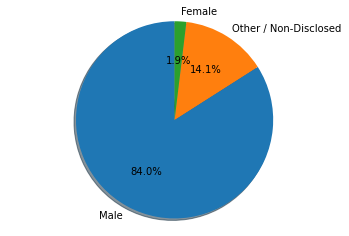

In [49]:
fig1, ax1 = plt.subplots()
ax1.pie(gender_demo_totals, labels=gender_list, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Purchasing Analysis (by Gender)

In [22]:
# create a df with only female players
female_df = data_df.loc[data_df['Gender'] == 'Female', :]

#create variables for summary
f_purchase_count = len(female_df['Purchase ID'].unique())
f_avg_price = female_df['Price'].mean()
f_total_rev = female_df['Price'].sum()

print(f'Purchase Count: {f_purchase_count}')
print(f'Average Purchase Price: {f_avg_price}')
print(f'Total Purchase Value: {f_total_rev}')
print(f'Avg Total Purchase per Person {f_total_rev/female_count}')


# Group by Screenname and Average
#female_avg_price = female_df[['SN', 'Price']]
#female_avg_price = female_avg_price.groupby(['SN']).mean()
#female_avg_price = female_avg_price.mean()
#female_avg_price

Purchase Count: 113
Average Purchase Price: 3.203008849557519
Total Purchase Value: 361.94
Avg Total Purchase per Person 4.468395061728395


In [23]:
# create a df with only male players
male_df = data_df.loc[data_df['Gender'] == 'Male', :]

#create variables for summary
m_purchase_count = len(male_df['Purchase ID'].unique())
m_avg_price = male_df['Price'].mean()
m_total_rev = male_df['Price'].sum()

print(f'Purchase Count: {m_purchase_count}')
print(f'Average Purchase Price: {m_avg_price}')
print(f'Total Purchase Value: {m_total_rev}')
print(f'Avg Total Purchase per Person {m_total_rev/male_count}')

Purchase Count: 652
Average Purchase Price: 3.0178527607361953
Total Purchase Value: 1967.64
Avg Total Purchase per Person 4.065371900826446


In [25]:
# create a df with only other players
other_df = data_df.loc[data_df['Gender'] == 'Other / Non-Disclosed', :]

#create variables for summary
o_purchase_count = len(other_df['Purchase ID'].unique())
o_avg_price = other_df['Price'].mean()
o_total_rev = other_df['Price'].sum()

print(f'Purchase Count: {o_purchase_count}')
print(f'Average Purchase Price: {o_avg_price}')
print(f'Total Purchase Value: {o_total_rev}')
print(f'Avg Total Purchase per Person {o_total_rev/other_count}')

Purchase Count: 15
Average Purchase Price: 3.3460000000000005
Total Purchase Value: 50.19
Avg Total Purchase per Person 4.5627272727272725
